In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
#nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import string
from nltk.collocations import *


In [2]:
Location = r'C:\Users\Leon\Desktop\ΤΕΔ2020\train.csv'
df = pd.read_csv(Location)


The most popular room type


,count
room_type,
Entire home/apt,24744
Private room,3214
Shared room,134


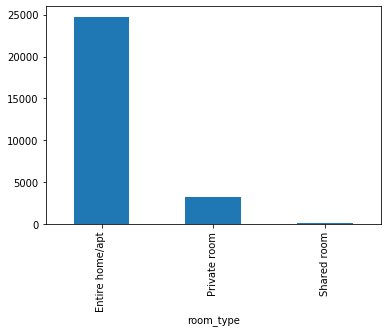

In [3]:
#1.1
rt = df.groupby('room_type').count()
rt=rt.rename(columns={'id': 'count'})
rt['count'].plot.bar()
print("The most popular room type")
rt=rt.sort_values(by='count', ascending=False)
rt[['count']]

Average price per month


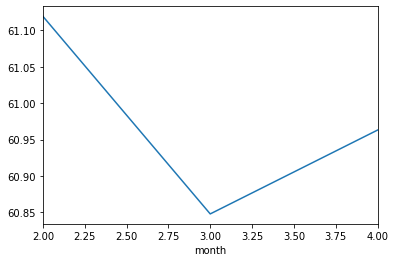

In [4]:
#1.2
priceflex = df.groupby('month').mean()
priceflex['price'].plot()
print("Average price per month")

Top 5 neighbourhoods by review count


,number_of_reviews
neighbourhood,
Plaka,47742
Koukaki,31901
Neos Kosmos,29018
Psyri,19825
Metaxourgeio,16458


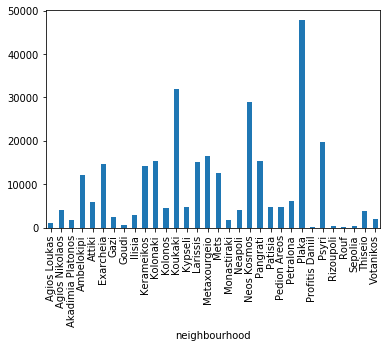

In [5]:
#1.3
neighb = df.sort_values(by='month', ascending=False)
neighb = neighb.drop_duplicates(subset=['id'])
neighb = neighb.groupby('neighbourhood').sum()
neighb['number_of_reviews'].plot.bar()
neighb=neighb.sort_values(by='number_of_reviews', ascending=False)
print("Top 5 neighbourhoods by review count")
neighb[['number_of_reviews']].head(5)

The neigbourhood with the most listings


,count
neighbourhood,
Plaka,3143


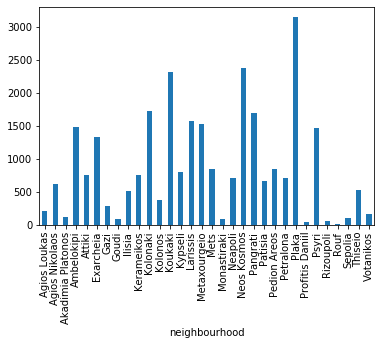

In [6]:
#1.4
neighb = df.groupby('neighbourhood').count()
neighb=neighb.rename(columns={'id': 'count'})
neighb['count'].plot.bar()
print("The neigbourhood with the most listings")
neighb=neighb.sort_values(by='count', ascending=False)
neighb[['count']].head(1)

In [7]:
#1.5
neighb = df.groupby(['neighbourhood','month']).count()
neighb=neighb.rename(columns={'id': 'count'})
print("Listings per neighbourhood per month")
neighb[['count']]

Listings per neighbourhood per month


count
neighbourhood     month       
Agios Loukas      2         68
                  3         70
                  4         71
Agios Nikolaos    2        196
                  3        206
                  4        209
Akadimia Platonos 2         23
                  3         44
                  4         47
Ambelokipi        2        469
                  3        502
                  4        511
Attiki            2        236
                  3        255
                  4        267
Exarcheia         2        382
                  3        468
                  4        480
Gazi              2        165
                  3         55
                  4         62
Goudi             2         27
                  3         30
                  4         30
Ilisia            2        154
                  3        172
                  4        176
Kerameikos        2         31
                  3        369
                  4        354
...                        ...
Pedion Areos      2        302
                  3        271
                  4        266
Petralona         2        225
                  3        230
                  4        245
Plaka             2        990
                  3       1037
                  4       1116
Profitis Daniil   2         12
                  3         15
                  4         13
Psyri             2        483
                  3        485
                  4        504
Rizoupoli         2         18
                  3         20
                  4         21
Rouf              2          4
                  3          4
                  4          4
Sepolia           2         27
                  3         33
                  4         37
Thiseio           2        313
                  3         94
                  4        112
Votanikos         2         50
                  3         54
                  4         59

[96 rows x 1 columns]

Listings per neighbourhood


,count
neighbourhood,
Plaka,3143
Neos Kosmos,2377
Koukaki,2315
Kolonaki,1716
Pangrati,1696
Larissis,1574
Metaxourgeio,1527
Ambelokipi,1482
Psyri,1472


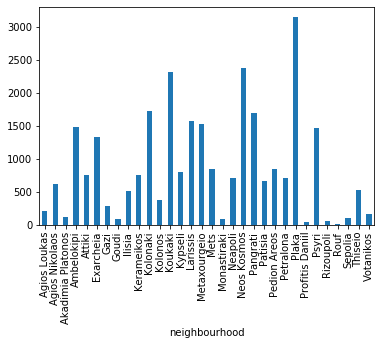

In [8]:
#1.6
neighb = df.groupby('neighbourhood').count()
neighb=neighb.rename(columns={'id': 'count'})
neighb['count'].plot.bar()
print("Listings per neighbourhood")
neighb=neighb.sort_values(by='count', ascending=False)
neighb[['count']]

In [9]:
#1.7
rtPerNeigh = df.groupby(['neighbourhood','room_type']).count()
rtPerNeigh = rtPerNeigh.rename(columns={'id': 'count'})
rtPerNeigh = rtPerNeigh.sort_values(by='count', ascending=False)
print("Most popular room type per neighbourhood")
rtPerNeigh[['count']].groupby(['neighbourhood']).head(1)

Most popular room type per neighbourhood


,,count
neighbourhood,room_type,
Plaka,Entire home/apt,2869
Neos Kosmos,Entire home/apt,2177
Koukaki,Entire home/apt,2101
Kolonaki,Entire home/apt,1612
Pangrati,Entire home/apt,1554
Ambelokipi,Entire home/apt,1386
Larissis,Entire home/apt,1276
Psyri,Entire home/apt,1182
Exarcheia,Entire home/apt,1171


The average price for each room type


,price
room_type,
Entire home/apt,61.979066
Private room,54.346297
Shared room,34.626866


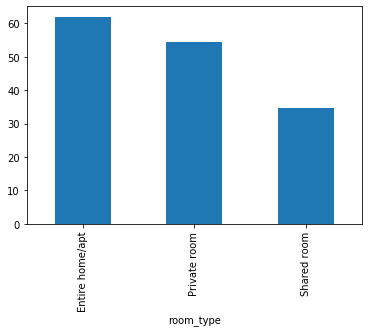

In [10]:
#1.8
price = df.groupby('room_type').mean()
price['price'].plot.bar()
print("The average price for each room type")
price[['price']]

In [11]:
#1.9

# map = folium.Map(location=[37.983810, 23.727539], zoom_start=13)

# colordict = {0: 'lightblue', 1: 'lightgreen', 2: 'orange', 3: 'red'}

# fmap = df[df['month']==4]

# for lat, lon,id, price in zip(fmap['latitude'], fmap['longitude'], fmap['id'], fmap['price']):
#     folium.CircleMarker(
#        [lat, lon],
#        radius=1.7,
#        popup = ('id: ' + str(id).capitalize() + '<br>'
#                 'price: ' + str(price) + '&euro;<br>'
        
#                ),
#        color='b',
#        key_on = id,
#        threshold_scale=[0,1,2,3],
#        fill_color=colordict[2],
#        fill=True,
#        fill_opacity=0.7
#        ).add_to(map)
# map

In [12]:
%%html
<img src='map.png',width="42" height="42">


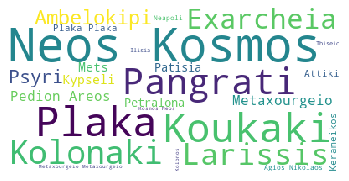

In [13]:
#1.10

cloud = WordCloud(background_color="white", max_words=25, stopwords=stopwords.words('english'))

neighb_cloud = cloud.generate(df['neighbourhood'].str.cat(sep='\n'))
plt.figure()
plt.imshow(neighb_cloud)
plt.axis("off")

plt.show()

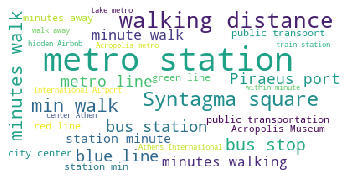

In [14]:
cloud = WordCloud(background_color="white", max_words=30, stopwords=stopwords.words('english'))

transit_cloud = cloud.generate(df['transit'].str.cat(sep='\n'))
plt.figure()
plt.imshow(transit_cloud)
plt.axis("off")

plt.show()

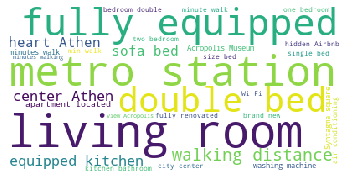

In [15]:
cloud = WordCloud(background_color="white", max_words=30, stopwords=stopwords.words('english'))

descr_cloud = cloud.generate(df['description'].str.cat(sep='\n'))
plt.figure()
plt.imshow(descr_cloud)
plt.axis("off")

plt.show()

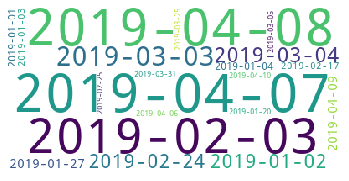

In [16]:
words = df['last_review'].value_counts()
words.index = words.index.map(str)
last_review_cloud = WordCloud(background_color="white", max_words=20, stopwords=stopwords.words('english')).generate_from_frequencies(words)

plt.figure()
plt.imshow(last_review_cloud)
plt.axis("off")

plt.show()

Neighbourhoods with the most listings in the worst 50 list, based on reviews


,count
neighbourhood,
Koukaki,7
Ambelokipi,5
Exarcheia,5
Neos Kosmos,5
Agios Nikolaos,3
Attiki,3
Ilisia,3
Mets,3
Patisia,3


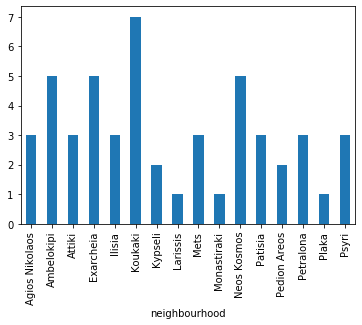

In [17]:
#1.11  katataksi twn perioxwn pou periexoun ta perissotera katalumata pou vriskontai sth lista me ta 50 xeirotera sumfwna me 
#ta reviews
list = df.dropna(subset=['id', 'review_scores_rating','neighbourhood'])
list=list.sort_values(by='review_scores_rating', ascending=False)
worst_list=list[['review_scores_rating','neighbourhood']].tail(50)
worst_list=worst_list.groupby(df['neighbourhood']).count()
worst_list=worst_list.rename(columns={'neighbourhood': 'count'})
worst_list['count'].plot.bar()
print("Neighbourhoods with the most listings in the worst 50 list, based on reviews")
worst_list[['count']].sort_values(by='count',ascending=False)



In [18]:
#1.12 katalumata xoris diathesimotita alla polles kritikes (>200)
num_reviews = df[(df['number_of_reviews'] >= 200) & (df['availability_365']==0)]
num_reviews=num_reviews.drop_duplicates('id')
print('Listings with zero availability but many reviews')
num_reviews[['id','number_of_reviews','availability_365']]

Listings with zero availability but many reviews


,id,number_of_reviews,availability_365
68,411452,313,0
149,776499,245,0
152,783657,323,0
202,1079291,603,0
221,1208210,222,0
233,1232279,252,0
476,3759135,293,0
499,4023665,324,0
9818,6330890,250,0
11539,16840498,234,0


In [19]:
#1.12 kai katalumata me megali diathesimotita alla katholou kritikes 
num_reviews = df[(df['number_of_reviews'] == 0) & (df['availability_365']>=300)]
num_reviews=num_reviews.drop_duplicates('id')
print('Listings with high availability but no reviews')
num_reviews[['id','number_of_reviews','availability_365']]

Listings with high availability but no reviews


,id,number_of_reviews,availability_365
7,31155,0,365
23,85539,0,365
36,167416,0,365
38,185936,0,365
116,641721,0,365
144,761910,0,365
153,783955,0,362
242,1274275,0,364
261,1479754,0,344
262,1482634,0,344


In [20]:
#3
df1=df.copy()
df1=df1[['id', 'name', 'description']]
df1 = df1.drop_duplicates(subset=['id'])

#df1['description'] = df.fillna({'data':''})
df1['description']=df1['description'].astype(str)
df1['name']=df1['name'].astype(str)               #metatroph se string

df1['description']= df1['description'].apply(lambda x: x.translate(str.maketrans('', '', string.digits)))
df1['name']= df1['name'].apply(lambda x: x.translate(str.maketrans('', '', string.digits)))   #afairesh arithmwn

df1['name']= df1['name'].apply(lambda x: x.lower())
df1['description']= df1['description'].apply(lambda x: x.lower())  #metatroph se mikra 

df1['description'] = df1['description'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df1['name'] = df1['name'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation))) #afairesh shmeiwn stiksis

stop=stopwords.words('english')
df1['name']  = df1['name'].apply(lambda x:' '.join([item for item in x.split() if item not in stop]))
df1['description'] = df1['description'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

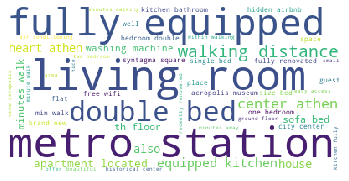

In [21]:
cloud = WordCloud(background_color="white", max_words=50, stopwords=stopwords.words('english'))

descr_cloud = cloud.generate(df1['description'].str.cat(sep='\n'))
plt.figure()
plt.imshow(descr_cloud)
plt.axis("off")

plt.show()


In [22]:
df1['name_descr'] = df1['name'].str.cat(df1['description'],sep=" ")
df1 = df1.dropna(subset=['name_descr'])
df1 = df1.reset_index(drop=True)


In [23]:
#3.1
dict=['aa']
my_stop_words = text.ENGLISH_STOP_WORDS.union(dict)
#my_stop_words = text.ENGLISH_STOP_WORDS
vectorizer = TfidfVectorizer( stop_words=my_stop_words,ngram_range=(1,2))
X = vectorizer.fit_transform(df1['name_descr'])
#X.toarray()
#print(vectorizer.get_feature_names()[0:100])
#print(X.shape)

In [24]:
#3.2
cs=cosine_similarity(X)

In [25]:
print(cs.shape)
print(df1.shape)
cs

(10375, 10375)
(10375, 4)


array([[1.        , 0.63242796, 0.68341444, ..., 0.01391834, 0.01599074,
        0.00570739],
       [0.63242796, 1.        , 0.74493106, ..., 0.01418739, 0.01345677,
        0.00516448],
       [0.68341444, 0.74493106, 1.        , ..., 0.01316892, 0.01842791,
        0.00574445],
       ...,
       [0.01391834, 0.01418739, 0.01316892, ..., 1.        , 0.01528398,
        0.        ],
       [0.01599074, 0.01345677, 0.01842791, ..., 0.01528398, 1.        ,
        0.01594191],
       [0.00570739, 0.00516448, 0.00574445, ..., 0.        , 0.01594191,
        1.        ]])

In [26]:
np.fill_diagonal(cs, 0) #set diagonal as 0 because it compares listings with themselves
temp=cs

In [27]:
diction={}
for i in range(100):
    mplace=np.unravel_index(temp.argmax(), temp.shape)
    temp[mplace]=0
    diction[df1['id'][mplace[0]]] = df1['id'][mplace[1]]
    #temp[np.flip(mplace)]=0

In [28]:
print(diction)

{28189886: 28191990, 28191990: 28189886, 30423408: 31514921, 31514921: 30423408, 22173279: 24214247, 24214247: 22173279, 26402249: 26402383, 26402383: 26402249, 24686198: 24689228, 24687560: 24689228, 24689228: 24687560, 27254673: 30009754, 30009754: 27254673, 30011086: 30221476, 30178142: 30221476, 30221476: 30178142, 22604588: 30580730, 26093644: 28715621, 26118238: 28715621, 28715621: 26118238, 30097307: 30917255, 30439676: 30514173, 30514220: 30514173, 30580730: 22604588, 30917255: 30097307, 30514173: 30514220, 33067136: 33092281, 33092281: 33067136, 27736231: 30593649, 30593649: 27736231, 33261412: 33283400, 33283400: 33261412, 32276334: 32337937, 32336457: 32337937, 32337937: 32336457, 32535952: 32730045, 32729313: 32730045, 32729671: 32730045, 32730045: 32729671, 25515948: 26118850, 26118125: 26118850, 26118850: 26118125, 32027068: 32028288, 32028288: 32027068, 15793210: 27774209, 26125014: 27686070, 26383438: 26620126, 26620126: 26383438, 27282238: 27686070, 27686070: 27282238,

In [29]:
def recommend(item_id,num):
    ind=df1.index[df1['id'] == item_id]
    if ind.empty:
        print("ID not found")
        return
    print('Recommending similar listings:\n')
    sortedArr =  (-cs[ind]).argsort()
    recs = sortedArr[:,:num]
    for i in range(num):
        print("Recommended:" + df1.name.loc[recs[0,i]]+ "\n")
        print("Description:" + df1.description.loc[recs[0,i]]+ "\n")
        print(cs[ind,recs[0,i]])
        print("\n\n")

        
    

In [30]:
recommend(25207595,5)


Recommending similar listings:

Recommended:syntagma apartment central athens

Description:renovated remake took place may everything new target offer simplicity feel high end standards deliver best possible value money city athens service airbnb community incomparable location seconds away syntagma square immediate access metro bus airport top choice syntagma square plaka new acropolis museum syntagma square easily enter area plaka oldest prestigious neighbourhood athens attached holy rock acropolis it’s “mustsee” area every visitor setting foot athens it’s unique it’s picturesque full labyrinthine alleys it’s like journey past don’t miss chance stroll around “anafiotika” cosy district plaka looks like small island popped north slope acropolis plaka’s main pedestrian kidathinaion adrianou find plenty stores selling tradit

[1.]



Recommended:syntagma apartment central athens

Description:apartment renovated remake took place may everything new target offer simplicity feel high end st

In [31]:
#3.4
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def stem_text(text):    
    stm = PorterStemmer()
    tokenized = word_tokenize(text)
    stem_tokes = []
    for toke in tokenized:
        stem_tokes.append(stm.stem(toke))
    stem_tokes
    combined = ''
    for stemmed in stem_tokes:
        combined += stemmed + ' '
    return combined

In [32]:
#df1['name_descr'] = df1['name_descr'].apply(stem_text) stemming made results worse

In [33]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b') 
# Tokenize name_descr
dirty_text_tokens = [tokenizer.tokenize(token.lower().strip()) for token in df1['name_descr']]
master_text_tokens = []
for text in dirty_text_tokens:
    clean_text_tokens = []
    
    for word in text:
        if ((word not in stopwords.words('english'))):
            clean_text_tokens.append(word)
    
    master_text_tokens.append(clean_text_tokens)

In [34]:
full_list = master_text_tokens[0]
for sub_list in master_text_tokens[1:]:
    full_list.extend(sub_list)

In [35]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(full_list)
finder.apply_freq_filter(500)

finder.nbest(bigram_measures.pmi, 10)


[('hidden', 'airbnb'),
 ('air', 'conditioning'),
 ('washing', 'machine'),
 ('coffee', 'maker'),
 ('brand', 'new'),
 ('walking', 'distance'),
 ('archaeological', 'museum'),
 ('ground', 'floor'),
 ('recently', 'renovated'),
 ('free', 'wifi')]